In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finpy_tse as tse

In [2]:
stock=tse.Get_CWI_History(ignore_date=True)
usdirr=tse.Get_USD_RIAL(ignore_date=True)

In [3]:
def intersect(data1,data2):
    intersection=[]
    if len(data1)>len(data2):
        for i in data1:
            if i in data2:
                intersection.append(i)
    else:
        for i in data2:
            if i in data1:
                intersection.append(i)
    #intersection=list(set(intersection))
    return np.array(intersection)


In [4]:
stock

,Open,High,Low,Close,Adj Close,Volume
J-Date,,,,,,
1387-09-16,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
1387-09-17,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
1387-09-18,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
1387-09-20,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
1387-09-23,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...
1401-12-22,1783610.0,1789170.0,1781620.0,1781632.0,1781632.1,7154751749
1401-12-23,1781890.0,1784010.0,1781890.0,1782988.0,1782987.7,7024872831
1401-12-24,1784520.0,1820990.0,1784520.0,1820988.0,1820987.6,10083167057


In [5]:
usdirr

,Open,High,Low,Close
J-Date,,,,
1390-09-06,13700,13700,13700,13700
1390-09-07,13440,13440,13440,13440
1390-09-08,13350,13350,13350,13350
1390-09-09,13400,13400,13400,13400
1390-09-10,13500,13500,13500,13500
...,...,...,...,...
1401-12-23,445300,459910,445000,459910
1401-12-24,461960,462100,451820,460460
1401-12-25,452940,456600,448300,456320


In [6]:
col=intersect(stock.columns,usdirr.columns)
col

array(['Open', 'High', 'Low', 'Close'], dtype='<U5')

In [7]:
ind=intersect(stock.index,usdirr.index)
ind

array(['1390-09-06', '1390-09-07', '1390-09-08', ..., '1401-12-24',
       '1401-12-27', '1401-12-28'], dtype='<U10')

In [8]:
stock_int=stock.loc[ind,col]
usdirr_int=usdirr.loc[ind,col]

In [9]:
stock_int

,Open,High,Low,Close
J-Date,,,,
1390-09-06,24467.0,24467.0,24056.0,24056.0
1390-09-07,24058.0,24058.0,23978.0,23978.0
1390-09-08,23976.0,24089.0,23976.0,24089.0
1390-09-09,24089.0,24089.0,24008.0,24016.0
1390-09-12,24016.0,24117.0,24016.0,24117.0
...,...,...,...,...
1401-12-22,1783610.0,1789170.0,1781620.0,1781632.0
1401-12-23,1781890.0,1784010.0,1781890.0,1782988.0
1401-12-24,1784520.0,1820990.0,1784520.0,1820988.0


In [10]:
usdirr_int

,Open,High,Low,Close
J-Date,,,,
1390-09-06,13700,13700,13700,13700
1390-09-07,13440,13440,13440,13440
1390-09-08,13350,13350,13350,13350
1390-09-09,13400,13400,13400,13400
1390-09-12,13650,13650,13650,13650
...,...,...,...,...
1401-12-22,433300,450300,433000,448170
1401-12-23,445300,459910,445000,459910
1401-12-24,461960,462100,451820,460460


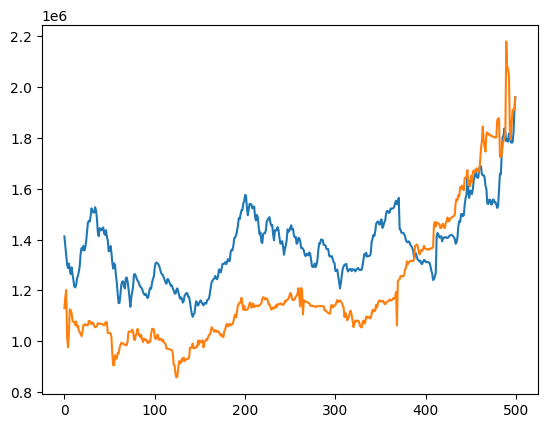

In [11]:
plt.plot(stock_int.Close.values[-500:])
plt.plot(usdirr_int.Close.values[-500:]*(stock_int.Close[-1]/usdirr_int.Close[-1]))

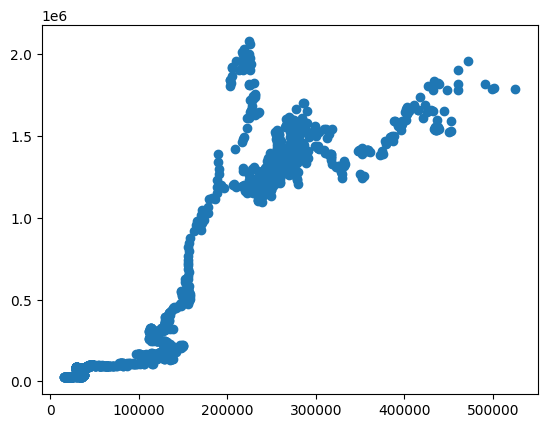

In [12]:
plt.scatter(usdirr_int.Close.values[-2562:],stock_int.Close.values[-2562:])

In [13]:
np.corrcoef(stock_int.Close[-2562:],usdirr_int.Close[-2562:])

array([[1.        , 0.94286068],
       [0.94286068, 1.        ]])

In [14]:
np.corrcoef(stock_int.Close[:100],usdirr_int.Close[:100])[1,0]

0.5140296377598058

In [23]:
look_back=100

In [24]:
cor_time=[]
for i in range(len(ind)-look_back):
    a=stock_int.Close[i:i+look_back]
    b=usdirr_int.Close[i:i+look_back]
    cor_time.append(np.corrcoef(a,b)[1,0])

In [25]:
cor_time

[0.5140296377598058,
 0.48884993910328417,
 0.45997921342285064,
 0.4272118604766592,
 0.3915677162572446,
 0.3595857770010998,
 0.3330664184595066,
 0.30893196717890786,
 0.2865062942738773,
 0.25811689369492946,
 0.22697188933255139,
 0.19325080806652578,
 0.15521982061937295,
 0.12240941912798471,
 0.08609636005193198,
 0.05199844916272238,
 0.024319597985765155,
 -0.008785050251311861,
 -0.056683412196727435,
 -0.1042842909542004,
 -0.15159141431972178,
 -0.20566768840060518,
 -0.2663733110750778,
 -0.32280278469330975,
 -0.37766068277164155,
 -0.4026499113252513,
 -0.45472360877476126,
 -0.5097844337829971,
 -0.5634125363813058,
 -0.6068701687366289,
 -0.6373517590638209,
 -0.6673019533800847,
 -0.6914267853916641,
 -0.7063543173047289,
 -0.7205844308231558,
 -0.7276446921980457,
 -0.7311259911046256,
 -0.7444428296073978,
 -0.7454275541597705,
 -0.7537389048670498,
 -0.7565015685946289,
 -0.758661223644745,
 -0.7609898095189871,
 -0.7666836882809385,
 -0.768665333410432,
 -0.7697

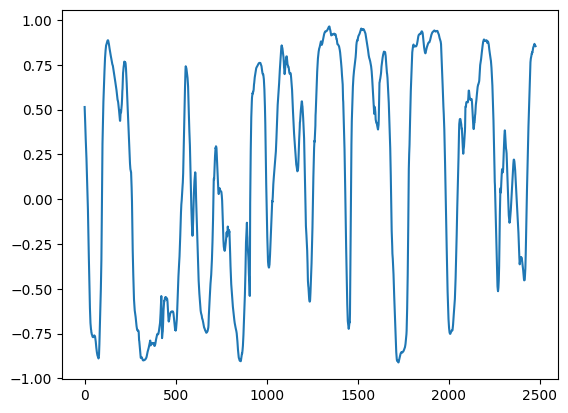

In [26]:
plt.plot(cor_time)